In [1]:
import numpy as np
from main.alpaca import *
from main.datagen import *
from main.dataViz import *

In [2]:
cfg_filename = 'configs/trajectory-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [3]:
num_input_points = config['num_input_points']
num_hand_points = config['num_hand_points']
input_dim = config['input_dim']
shuffle = config['shuffle']
train_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/train/', num_input_points, num_hand_points, input_dim, shuffle)
test_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/valid/', num_input_points, num_hand_points, input_dim, shuffle)

num_samples_train = 200
Y1, X1, init1 = train_dataset.sample_trajectories(num_samples_train)
Y2, X2, init2 = train_dataset.sample_trajectories(num_samples_train)
print('Y1 size', Y1.shape)
print('X1 size', X1.shape)
print('init1 size', init1.shape)

num_samples_test = 20
Y_test1, X_test1, init_test1 = test_dataset.sample_trajectories(num_samples_test)
Y_test2, X_test2, init_test2 = test_dataset.sample_trajectories(num_samples_test)

noise1 = 0.1
noise2 = 0.3
noise3 = 0.5

Y1 size (200, 1140, 63)
X1 size (200, 1140, 567)
init1 size (200, 1140, 63)


In [ ]:
# g1 = tf.Graph()
# sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
# agent1 = ALPaCA(config)
# agent1.sigma_scalar = noise1
# agent1.construct_model(sess1, g1)
# agent1.train(sess1, Y1, X1, 10000, plot_loss=True)

loss: -119.703384
loss: -79.21129
loss: -108.88544
loss: -125.412
loss: -140.51035
loss: -138.39299
loss: -120.58594
loss: -137.9552
loss: -116.863754
loss: -109.80821
loss: -129.73007
loss: -122.22207
loss: -130.28467
loss: -141.49794
loss: -112.223404
loss: -131.59892
loss: -128.1078
loss: -116.48567
loss: -124.87207
loss: -122.68502
loss: -135.12161
loss: -137.1734
loss: -127.3658
loss: -107.62224
loss: -123.283005
loss: -121.733986
loss: -135.92111
loss: -118.72681
loss: -137.4341
loss: -123.50391
loss: -102.39846
loss: -120.78471
loss: -127.73653
loss: -103.22786
loss: -110.34685
loss: -127.169754
loss: -118.19971
loss: -125.85879
loss: -128.95071
loss: -105.78325


/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


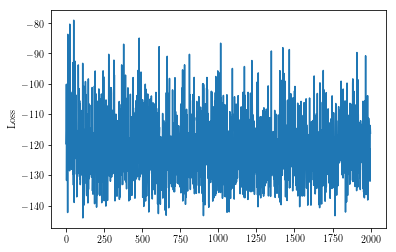

In [4]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent1 = ALPaCA(config)
agent1.sigma_scalar = noise1
agent1.construct_model(sess1, g1)
agent1.train(sess1, Y1, X1, 2000, plot_loss=True)

loss: -41.212116
loss: -66.490005
loss: -40.20152
loss: -41.205975
loss: -44.285126
loss: -38.453785
loss: -58.8792
loss: -67.057686
loss: -44.704712
loss: -63.789417
loss: -53.4459
loss: -64.3422
loss: -59.49105
loss: -53.38872
loss: -61.35842
loss: -40.182995
loss: -57.139435
loss: -62.78197
loss: -59.389305
loss: -60.616253
loss: -45.034237
loss: -58.176258
loss: -54.221233
loss: -66.911575
loss: -66.435074
loss: -68.66037
loss: -47.77029
loss: -59.572277
loss: -51.258766
loss: -61.184593
loss: -56.463997
loss: -52.743164
loss: -62.03059
loss: -43.736446
loss: -55.846733
loss: -51.343822
loss: -38.77253
loss: -59.656586
loss: -56.712715
loss: -68.56039


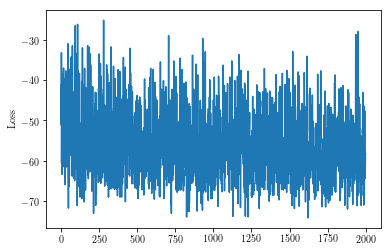

In [5]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent2 = ALPaCA(config)
agent2.sigma_scalar = noise2
agent2.construct_model(sess2, g2)
agent2.train(sess2, Y2, X2, 2000, plot_loss=True)

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d

def plot_hand_points(hand_points):
    x_coords = hand_points[::3]
    y_coords = hand_points[1::3]
    z_coords = hand_points[2::3]
    
    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    hand_plot = ax.scatter(x_coords, y_coords, z_coords)
    
    def plot_finger(inds_array):
        for i in range(len(inds_array)-1):
            xs = (x_coords[inds_array[i]], x_coords[inds_array[i+1]])
            ys = (y_coords[inds_array[i]], y_coords[inds_array[i+1]])
            zs = (z_coords[inds_array[i]], z_coords[inds_array[i+1]])
            line_seg = plt3d.art3d.Line3D(xs, ys, zs)
            ax.add_line(line_seg)
        
    # Draw thumb
    thumb_inds = [0, 1, 6, 7, 8]
    plot_finger(thumb_inds)
    
    # Draw index
    index_inds = [0, 2, 9, 10, 11]
    plot_finger(index_inds)
    
    # Draw middle
    middle_inds = [0, 3, 12, 13, 14]
    plot_finger(middle_inds)
    
    # Draw ring
    ring_inds = [0, 4, 15, 16, 17]
    plot_finger(ring_inds)
    
    # Draw pinky
    pinky_inds = [0, 5, 18, 19, 20]
    plot_finger(pinky_inds)
        
    plt.show()

def plot_two_hands(hand_points1, hand_points2):
    x_coords1 = hand_points1[::3]
    y_coords1 = hand_points1[1::3]
    z_coords1 = hand_points1[2::3]
    
    x_coords2 = hand_points2[::3]
    y_coords2 = hand_points2[1::3]
    z_coords2 = hand_points2[2::3]
    
    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    hand_plot1 = ax.scatter(x_coords1, y_coords1, z_coords1)
    hand_plot2 = ax.scatter(x_coords2, y_coords2, z_coords2)
    
    def plot_finger(inds_array, x_coords, y_coords, z_coords, color='b'):
        for i in range(len(inds_array)-1):
            xs = (x_coords[inds_array[i]], x_coords[inds_array[i+1]])
            ys = (y_coords[inds_array[i]], y_coords[inds_array[i+1]])
            zs = (z_coords[inds_array[i]], z_coords[inds_array[i+1]])
            line_seg = plt3d.art3d.Line3D(xs, ys, zs, color=color)
            ax.add_line(line_seg)
        
    # Draw thumbs
    thumb_inds = [0, 1, 6, 7, 8]
    plot_finger(thumb_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(thumb_inds, x_coords2, y_coords2, z_coords2, color='r')
    
    # Draw indexes
    index_inds = [0, 2, 9, 10, 11]
    plot_finger(index_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(index_inds, x_coords2, y_coords2, z_coords2, color='r')
    
    # Draw middles
    middle_inds = [0, 3, 12, 13, 14]
    plot_finger(middle_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(middle_inds, x_coords2, y_coords2, z_coords2, color='r')
    
    # Draw rings
    ring_inds = [0, 4, 15, 16, 17]
    plot_finger(ring_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(ring_inds, x_coords2, y_coords2, z_coords2, color='r')
    
    # Draw pinkies
    pinky_inds = [0, 5, 18, 19, 20]
    plot_finger(pinky_inds, x_coords1, y_coords1, z_coords1)
    plot_finger(pinky_inds, x_coords2, y_coords2, z_coords2, color='r')
        
    plt.show()

In [ ]:
# import matplotlib.animation as animation

# fig = plt.figure()
# fig.set_size_inches(10,10)
# ax = fig.add_subplot(111, projection='3d', aspect='equal')
    
# def animate(i):
#     temp_test = Y_test1[:,-63:,:]
#     y, s = agent1.test(sess1, X_test1, Y_test1, temp_test)
#     return plot_hand_points(y[0,:,:])
    
# anim = animation.FuncAnimation(fig, animate, interval=20, repeat=False, blit=False)

In [ ]:
print(Y_test1.shape)
print(X_test1.shape)
print(init_test1.shape)
print(np.squeeze(X_test1[0, 0, 0:63]).shape)
plot_hand_points(init_test1[0, 0, :])
hand1 = np.squeeze(X_test1[0, 0, 0:63]) + init_test1[0, 0, :]
hand2 = hand1 + np.squeeze(X_test1[0, 0, 63:126])
plot_hand_points(hand1)
plot_two_hands(hand1, hand2)

In [ ]:
x_test = X_test1[0,:,:];
y_test = Y_test1[0,:,:];
print(x_test.shape)
print(y_test.shape)

x_test = x_test[~np.all(x_test == 0, axis=1)]
y_test = y_test[~np.all(y_test == 0, axis=1)]
print(x_test.shape)
print(y_test.shape)

next_positions = init_test1[0,:,:]
print('next_positions', next_pos.shape)

for i in range(1, 10):
    ux = x_test[:i, :]
    ux = np.expand_dims(ux, axis=0)
    uy = y_test[:i, :]
    uy = np.expand_dims(uy, axis=0)
    x = x_test[i, :]
    x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos = next_positions[i,:]
    print('next_pos', next_pos.shape)
    print('x shape', x.shape)
    
    for j in range(9):
        next_pos += np.squeeze(x[:,:,63*j:63*(j+1)])
        
    pred_hand = next_pos + np.squeeze(y)
    true_hand = next_pos + y_test[i, :]
    plot_two_hands(pred_hand, true_hand)


In [ ]:
# next_pos = Y_test1[:,-63:,:] # next_pos is the actual next position
# y, s = agent1.test(sess1, X_test1, Y_test1, next_pos) # y is the predicted next position
# plot_hand_points(np.squeeze(y[0,:,:]))
# print(next_pos-y)

x_test = X_test1;
y_test = Y_test1;
print(x_test.shape)
print(y_test.shape)
print(full_test1.shape)

for i in range(5):
    x_test = full_test1[:,i*63:(i+num_input_points)*63,:]
    y_test = full_test1[:,(i+1)*63:(i+1+num_input_points)*63,:]
    next_pos = y_test[:,-63:,:]
    y, s = agent1.test(sess1, x_test, y_test, next_pos) # y is the predicted next position
    plot_two_hands(np.squeeze(y[0,:,:]), np.squeeze(next_pos[0,:,:]))
    

In [ ]:
ind = 2
sample_size_list = [0,2,4,6,8,10,12,14,16,18,20]
plt.figure(figsize=(9,len(sample_size_list)*1))
for i,num_pts in enumerate(sample_size_list):
    X_update1 = X_test1[ind:(ind+1),:num_pts,:]
    Y_update1 = Y_test1[ind:(ind+1),:num_pts,:]
    
    X_update2 = X_test2[ind:(ind+1),:num_pts,:]
    Y_update2 = Y_test2[ind:(ind+1),:num_pts,:]
    
    title=None
    legend=False
    if i == 0:
        legend=True
        title=True

    ax1 = plt.subplot(len(sample_size_list),3,3*i+1)
    gen_multistep_fig(agent1, sess1, X_update1, Y_update1, step_mat_test[ind,:], label=None)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.1$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
        
    ax2 = plt.subplot(len(sample_size_list),3,3*i+2, sharey=ax1)
    gen_multistep_fig(agent2, sess2, X_update2, Y_update2, step_mat_test[ind,:], label=None)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.3$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
    
    ax3 = plt.subplot(len(sample_size_list),3,3*i+3, sharey=ax1)
    gen_multistep_fig(agent3, sess3, X_update3, Y_update3, step_mat_test[ind,:], label=None)
    plt.setp(ax3.get_yticklabels(), visible=False)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.5$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax3.get_xticklabels(), visible=False)

plt.tight_layout(w_pad=0.0,h_pad=0.2)
plt.savefig('figures/multistep_varying_noise.pdf')
plt.show()